<a href="https://colab.research.google.com/github/esh04/Clickbait-Identification/blob/main/Clickbait.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **IMPORTING THE REQUIRED LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [2]:
path = "trainData.csv"
df = pd.read_csv(path)
df.drop('id', inplace=True, axis=1)
df

,sentence,label
0,यह एक जबड़ा छोड़ने वाली डिलीवरी है! 50-टन व्हे...,0
1,जस्टिन बीबर नई तस्वीरों की बाढ़ के साथ अपने इं...,1
2,रॉल्फ हैरिस कुछ ही महीनों में मुक्त हो सकता है...,0
3,"बीएमसी चुनाव: बीजेपी, शिवसेना ने मतदाताओं को ग...",0
4,चीनी पुलिस ने 100 किलोग्राम मेथ जब्त किया\n,0
...,...,...
41795,ईएसपीएन ने &#39;स्पोर्ट्स बबल&#39; के लीडिंग ए...,1
41796,जलते हुए आदमी की ये तस्वीरें आपको डब्ल्यूटीएफ ...,1
41797,मस्तिष्क रक्त के थक्के के साथ अस्पताल में रूपा...,0
41798,सबसे बड़ी आसानी के साथ। । ।\n,0


In [3]:
sentence_list = df['sentence'].to_list()


### Replacing various outliers in the dataset suitably

In [4]:
new_sentence_list = []
for sent in sentence_list:
  sent = sent.replace('\n','')
  sent = sent.replace('&#39',"'")
  sent = sent.replace('&#39;',"'")
  sent = sent.replace('quot;','"')
  sent = sent.replace('&','')
  sent = sent.replace('#','')
  sent = sent.replace('$','')
  sent = sent.replace('%','')
  sent = sent.replace('-','')
  sent = sent.replace('...','')
  new_sentence_list.append(sent)


## Functions to remove numbers or capital letters from the text

In [5]:
#FUNCTION TO REMOVE NUMERALS
import re 
def remove_num(list):
    pattern = '[0-9]'
    list = [re.sub(pattern, '', i) for i in list]
    return list

def remove_caps(list):
    pattern = '[a-zA-Z]+'
    list = [re.sub(pattern, '', i) for i in list]
    return list
  
#new_sentence_list = remove_num(new_sentence_list)
#new_sentence_list = remove_caps(new_sentence_list)



## Analysis Based on Word Tokens/ Number of words

In [6]:
#sentence tokens for judging
from nltk.tokenize import sent_tokenize, word_tokenize

In [7]:
no_of_tokens = []
list_of_tokens = []
for i in new_sentence_list:
  token_list = []
  for t in word_tokenize(i): 
    token_list.append(t)
  no_of_tokens.append(len(token_list))

  #maintain a list containing list of all tokens in a sentence
  list_of_tokens.append(token_list)

#add new column for analysis
df = df.assign(num_tokens = no_of_tokens)
df

,sentence,label,num_tokens
0,यह एक जबड़ा छोड़ने वाली डिलीवरी है! 50-टन व्हे...,0,34
1,जस्टिन बीबर नई तस्वीरों की बाढ़ के साथ अपने इं...,1,14
2,रॉल्फ हैरिस कुछ ही महीनों में मुक्त हो सकता है...,0,21
3,"बीएमसी चुनाव: बीजेपी, शिवसेना ने मतदाताओं को ग...",0,15
4,चीनी पुलिस ने 100 किलोग्राम मेथ जब्त किया\n,0,8
...,...,...,...
41795,ईएसपीएन ने &#39;स्पोर्ट्स बबल&#39; के लीडिंग ए...,1,14
41796,जलते हुए आदमी की ये तस्वीरें आपको डब्ल्यूटीएफ ...,1,14
41797,मस्तिष्क रक्त के थक्के के साथ अस्पताल में रूपा...,0,12
41798,सबसे बड़ी आसानी के साथ। । ।\n,0,7


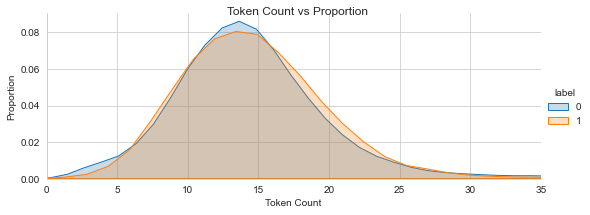

In [8]:
sns.set_style("whitegrid")
plotOne = sns.FacetGrid(df, hue="label",aspect=2.5)
plotOne.map(sns.kdeplot,'num_tokens',shade=True)
#plotOne.set(xlim=(0, df['num_tokens'].max()))
plotOne.set(xlim=(0, 35))
plotOne.add_legend()
plotOne.set_axis_labels('Token Count', 'Proportion')
plotOne.fig.suptitle('Token Count vs Proportion')
plt.show()

## Analysis based on exclamation and question marks

In [9]:
#This checks for presence of ?
is_it_que = []
for i in new_sentence_list:
  count = 0;
  for j in range(0,len(i)):
    if i[j] in ("?"):  
      count = count + 1;  
  is_it_que.append(count)
df = df.assign(is_que = is_it_que)
df

,sentence,label,num_tokens,is_que
0,यह एक जबड़ा छोड़ने वाली डिलीवरी है! 50-टन व्हे...,0,34,0
1,जस्टिन बीबर नई तस्वीरों की बाढ़ के साथ अपने इं...,1,14,0
2,रॉल्फ हैरिस कुछ ही महीनों में मुक्त हो सकता है...,0,21,0
3,"बीएमसी चुनाव: बीजेपी, शिवसेना ने मतदाताओं को ग...",0,15,0
4,चीनी पुलिस ने 100 किलोग्राम मेथ जब्त किया\n,0,8,0
...,...,...,...,...
41795,ईएसपीएन ने &#39;स्पोर्ट्स बबल&#39; के लीडिंग ए...,1,14,0
41796,जलते हुए आदमी की ये तस्वीरें आपको डब्ल्यूटीएफ ...,1,14,0
41797,मस्तिष्क रक्त के थक्के के साथ अस्पताल में रूपा...,0,12,0
41798,सबसे बड़ी आसानी के साथ। । ।\n,0,7,0


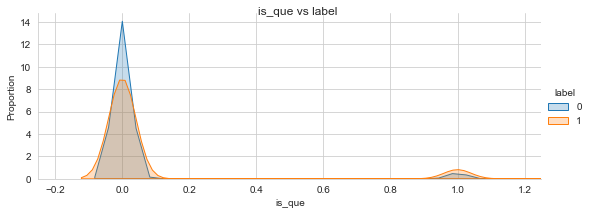

In [10]:
sns.set_style("whitegrid")
plotOne = sns.FacetGrid(df, hue="label",aspect=2.5)
plotOne.map(sns.kdeplot,'is_que',shade=True)
#plotOne.set(xlim=(0, df['num_tokens'].max()))
plotOne.set(xlim=(-0.25, 1.25))
plotOne.add_legend()
plotOne.set_axis_labels('is_que', 'Proportion')
plotOne.fig.suptitle('is_que vs label')
plt.show()

In [11]:
#This checks for presence of !
is_it_exclam = []
for i in new_sentence_list:
  count = 0;
  for j in range(0,len(i)):
    if i[j] in ("!"):  
      count = count + 1;  
  is_it_exclam.append(count)
df = df.assign(is_exclam = is_it_exclam)
df

,sentence,label,num_tokens,is_que,is_exclam
0,यह एक जबड़ा छोड़ने वाली डिलीवरी है! 50-टन व्हे...,0,34,0,1
1,जस्टिन बीबर नई तस्वीरों की बाढ़ के साथ अपने इं...,1,14,0,0
2,रॉल्फ हैरिस कुछ ही महीनों में मुक्त हो सकता है...,0,21,0,0
3,"बीएमसी चुनाव: बीजेपी, शिवसेना ने मतदाताओं को ग...",0,15,0,0
4,चीनी पुलिस ने 100 किलोग्राम मेथ जब्त किया\n,0,8,0,0
...,...,...,...,...,...
41795,ईएसपीएन ने &#39;स्पोर्ट्स बबल&#39; के लीडिंग ए...,1,14,0,0
41796,जलते हुए आदमी की ये तस्वीरें आपको डब्ल्यूटीएफ ...,1,14,0,0
41797,मस्तिष्क रक्त के थक्के के साथ अस्पताल में रूपा...,0,12,0,0
41798,सबसे बड़ी आसानी के साथ। । ।\n,0,7,0,0


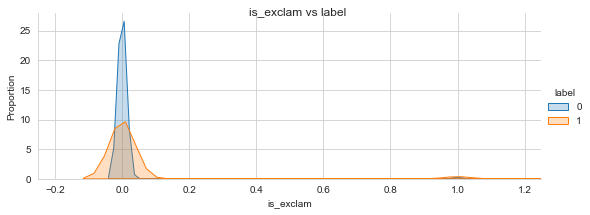

In [12]:
sns.set_style("whitegrid")
plotOne = sns.FacetGrid(df, hue="label",aspect=2.5)
plotOne.map(sns.kdeplot,'is_exclam',shade=True)
#plotOne.set(xlim=(0, df['num_tokens'].max()))
plotOne.set(xlim=(-0.25, 1.25))
plotOne.add_legend()
plotOne.set_axis_labels('is_exclam', 'Proportion')
plotOne.fig.suptitle('is_exclam vs label')
plt.show()

In [13]:
#This checks for presence of quotes
is_it_quote = []
for i in new_sentence_list:
  count = 0;
  for j in range(0,len(i)):
    if i[j] in ("'", '"'):  
      count = 1;  
  is_it_quote.append(count)
df = df.assign(is_quote = is_it_quote)
df

,sentence,label,num_tokens,is_que,is_exclam,is_quote
0,यह एक जबड़ा छोड़ने वाली डिलीवरी है! 50-टन व्हे...,0,34,0,1,0
1,जस्टिन बीबर नई तस्वीरों की बाढ़ के साथ अपने इं...,1,14,0,0,0
2,रॉल्फ हैरिस कुछ ही महीनों में मुक्त हो सकता है...,0,21,0,0,0
3,"बीएमसी चुनाव: बीजेपी, शिवसेना ने मतदाताओं को ग...",0,15,0,0,0
4,चीनी पुलिस ने 100 किलोग्राम मेथ जब्त किया\n,0,8,0,0,0
...,...,...,...,...,...,...
41795,ईएसपीएन ने &#39;स्पोर्ट्स बबल&#39; के लीडिंग ए...,1,14,0,0,1
41796,जलते हुए आदमी की ये तस्वीरें आपको डब्ल्यूटीएफ ...,1,14,0,0,0
41797,मस्तिष्क रक्त के थक्के के साथ अस्पताल में रूपा...,0,12,0,0,0
41798,सबसे बड़ी आसानी के साथ। । ।\n,0,7,0,0,0


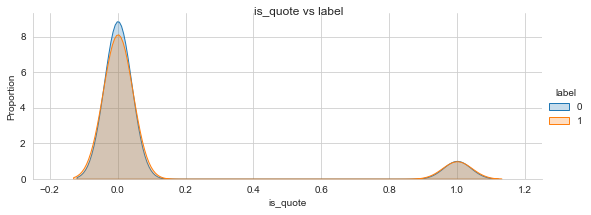

In [14]:
sns.set_style("whitegrid")
plotOne = sns.FacetGrid(df, hue="label",aspect=2.5)
plotOne.map(sns.kdeplot,'is_quote',shade=True)
#plotOne.set(xlim=(0, df['num_tokens'].max()))
plotOne.set(xlim=(-0.25, 1.25))
plotOne.add_legend()
plotOne.set_axis_labels('is_quote', 'Proportion')
plotOne.fig.suptitle('is_quote vs label')
plt.show()

## Analysis based on number of stop words

In [15]:
#Number of stopwords in the headline
def count_stopwords(sentence_list,df):
    filename = 'stopwords.txt'
    file = open(filename, 'rt')
    stop_words = file.read()
    file.close()
    count_stopwords = []
    for sentence in sentence_list:
        count = 0;
        for word in sentence:
            if word in stop_words:  
              count += 1;  
        count_stopwords.append(count)
    df = df.assign(num_stopwords = count_stopwords)
    return df

df = count_stopwords(list_of_tokens,df)
df
        

,sentence,label,num_tokens,is_que,is_exclam,is_quote,num_stopwords
0,यह एक जबड़ा छोड़ने वाली डिलीवरी है! 50-टन व्हे...,0,34,0,1,0,19
1,जस्टिन बीबर नई तस्वीरों की बाढ़ के साथ अपने इं...,1,14,0,0,0,5
2,रॉल्फ हैरिस कुछ ही महीनों में मुक्त हो सकता है...,0,21,0,0,0,13
3,"बीएमसी चुनाव: बीजेपी, शिवसेना ने मतदाताओं को ग...",0,15,0,0,0,5
4,चीनी पुलिस ने 100 किलोग्राम मेथ जब्त किया\n,0,8,0,0,0,2
...,...,...,...,...,...,...,...
41795,ईएसपीएन ने &#39;स्पोर्ट्स बबल&#39; के लीडिंग ए...,1,14,0,0,1,4
41796,जलते हुए आदमी की ये तस्वीरें आपको डब्ल्यूटीएफ ...,1,14,0,0,0,7
41797,मस्तिष्क रक्त के थक्के के साथ अस्पताल में रूपा...,0,12,0,0,0,4
41798,सबसे बड़ी आसानी के साथ। । ।\n,0,7,0,0,0,2


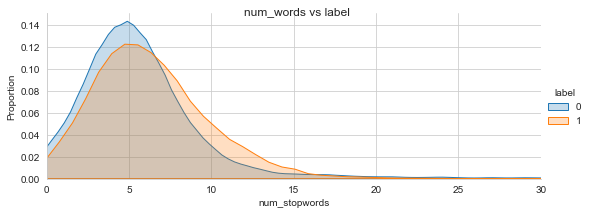

In [16]:
sns.set_style("whitegrid")
plotOne = sns.FacetGrid(df, hue="label",aspect=2.5)
plotOne.map(sns.kdeplot,'num_stopwords',shade=True)
plotOne.set(xlim=(0, 30))
plotOne.add_legend()
plotOne.set_axis_labels('num_stopwords', 'Proportion')
plotOne.fig.suptitle('num_words vs label')
plt.show()

## Analysis based on numerals present or not in the dataset

In [17]:
#This checks if sentence has number in it or not
has_digit = []
for i in sentence_list:
  count = 0
  for char in i:
    if char.isdigit():
      count = count + 1
  has_digit.append(count)
num_dig = []
for i in has_digit:
  if i >= 2:
    num_dig.append(1)
  else:
    num_dig.append(0)

df = df.assign(has_num = num_dig)
df

,sentence,label,num_tokens,is_que,is_exclam,is_quote,num_stopwords,has_num
0,यह एक जबड़ा छोड़ने वाली डिलीवरी है! 50-टन व्हे...,0,34,0,1,0,19,1
1,जस्टिन बीबर नई तस्वीरों की बाढ़ के साथ अपने इं...,1,14,0,0,0,5,0
2,रॉल्फ हैरिस कुछ ही महीनों में मुक्त हो सकता है...,0,21,0,0,0,13,0
3,"बीएमसी चुनाव: बीजेपी, शिवसेना ने मतदाताओं को ग...",0,15,0,0,0,5,0
4,चीनी पुलिस ने 100 किलोग्राम मेथ जब्त किया\n,0,8,0,0,0,2,1
...,...,...,...,...,...,...,...,...
41795,ईएसपीएन ने &#39;स्पोर्ट्स बबल&#39; के लीडिंग ए...,1,14,0,0,1,4,1
41796,जलते हुए आदमी की ये तस्वीरें आपको डब्ल्यूटीएफ ...,1,14,0,0,0,7,0
41797,मस्तिष्क रक्त के थक्के के साथ अस्पताल में रूपा...,0,12,0,0,0,4,0
41798,सबसे बड़ी आसानी के साथ। । ।\n,0,7,0,0,0,2,0


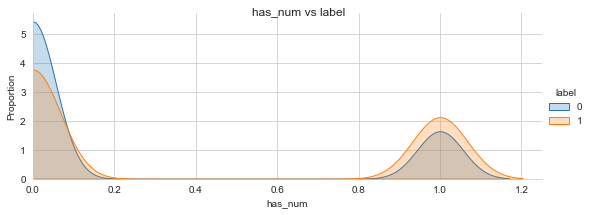

In [18]:
sns.set_style("whitegrid")
plotOne = sns.FacetGrid(df, hue="label",aspect=2.5)
plotOne.map(sns.kdeplot,'has_num',shade=True)
#plotOne.set(xlim=(0, df['num_tokens'].max()))
plotOne.set(xlim=(0, 1.25))
plotOne.add_legend()
plotOne.set_axis_labels('has_num', 'Proportion')
plotOne.fig.suptitle('has_num vs label')
plt.show()

## Analysis based on the entities present

In [19]:
# https://polyglot.readthedocs.io/en/stable/NamedEntityRecognition.html
!pip install polyglot
!pip install PyICU
!pip install pycld2
from polyglot.downloader import downloader
print(downloader.supported_languages_table("ner2", 26))
!pip install morfessor

from polyglot.downloader import downloader
!polyglot download embeddings2.hi
!polyglot download ner2.hi

from polyglot.text import Text


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  1. Italian                    2. Hindi                      3. French                   
  4. Spanish; Castilian         5. Vietnamese                 6. Arabic                   
  7. Bulgarian                  8. Norwegian                  9. Estonian                 
 10. Japanese                  11. Greek, Modern             12. Slovene                  
 13. Korean                    14. Serbian                   15. Finnish                  
 16. Catalan; Valencian        17. Croatian                  18. Dutch                    
 19. Swedish                   20. Tagalog                   21. Danish                   
 22. Latvian                   23. Ukrainian                 24. Romanian, Moldavian, ... 
 25. Persian                   26. Slo

In [20]:
def sentence_NER(sentence_list , df):

    count_PER = []
    count_ORG = []
    count_LOC = []
    PER = []
    ORG = []
    LOC = []
    
    for blob in sentence_list:
        
        text = Text(blob, hint_language_code='hi')
        for entity in text.entities:
            temp_PER = []
            temp_LOC = []
            temp_ORG = []
            if entity.tag == "I-PER":
                temp_PER.extend(entity)
            elif entity.tag == "I-LOC":
                temp_LOC.extend(entity)
            elif entity.tag == "I-ORG":
                temp_ORG.extend(entity)
                
        count_PER.append(len(temp_PER))
        count_ORG.append(len(temp_ORG))
        count_LOC.append(len(temp_LOC))
        PER.append(temp_PER)
        ORG.append(temp_ORG)
        LOC.append(temp_LOC)
            
        
 
    df = df.assign(PER_count = count_PER)
    df = df.assign(ORG_count = count_ORG)
    df = df.assign(LOC_count = count_LOC)
    df = df.assign(PER_entities = PER)
    df = df.assign(ORG_entities = ORG)
    df = df.assign(LOC_entities = LOC)
    
    return df

df = sentence_NER(new_sentence_list,df)
   

In [21]:
sum_column = df["ORG_count"] + df["PER_count"] + df["LOC_count"]
df["total_NER"] = sum_column

df

,sentence,label,num_tokens,is_que,is_exclam,is_quote,num_stopwords,has_num,PER_count,ORG_count,LOC_count,PER_entities,ORG_entities,LOC_entities,total_NER
0,यह एक जबड़ा छोड़ने वाली डिलीवरी है! 50-टन व्हे...,0,34,0,1,0,19,1,0,0,1,[],[],[चीन],1
1,जस्टिन बीबर नई तस्वीरों की बाढ़ के साथ अपने इं...,1,14,0,0,0,5,0,2,0,0,"[जस्टिन, बीबर]",[],[],2
2,रॉल्फ हैरिस कुछ ही महीनों में मुक्त हो सकता है...,0,21,0,0,0,13,0,2,0,0,"[रॉल्फ, हैरिस]",[],[],2
3,"बीएमसी चुनाव: बीजेपी, शिवसेना ने मतदाताओं को ग...",0,15,0,0,0,5,0,0,1,0,[],[शिवसेना],[],1
4,चीनी पुलिस ने 100 किलोग्राम मेथ जब्त किया\n,0,8,0,0,0,2,1,0,1,0,[],[शिवसेना],[],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41795,ईएसपीएन ने &#39;स्पोर्ट्स बबल&#39; के लीडिंग ए...,1,14,0,0,1,4,1,0,1,0,[],[ईएसपीएन],[],1
41796,जलते हुए आदमी की ये तस्वीरें आपको डब्ल्यूटीएफ ...,1,14,0,0,0,7,0,0,1,0,[],[ईएसपीएन],[],1
41797,मस्तिष्क रक्त के थक्के के साथ अस्पताल में रूपा...,0,12,0,0,0,4,0,2,0,0,"[रूपा, गांगुली]",[],[],2
41798,सबसे बड़ी आसानी के साथ। । ।\n,0,7,0,0,0,2,0,2,0,0,"[रूपा, गांगुली]",[],[],2


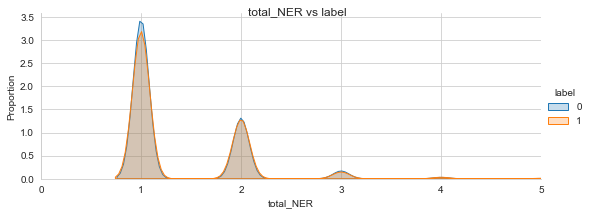

In [22]:
sns.set_style("whitegrid")
plotOne = sns.FacetGrid(df, hue="label",aspect=2.5)
plotOne.map(sns.kdeplot,'total_NER',shade=True)
plotOne.set(xlim=(0, 5))
plotOne.add_legend()
plotOne.set_axis_labels('total_NER', 'Proportion')
plotOne.fig.suptitle('total_NER vs label')
plt.show()

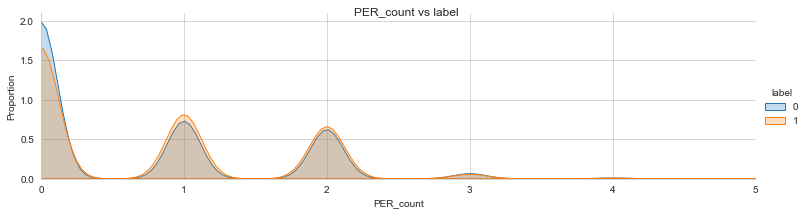

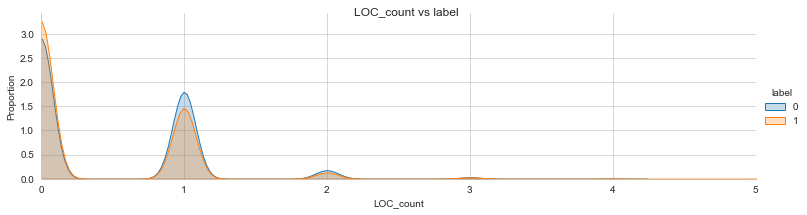

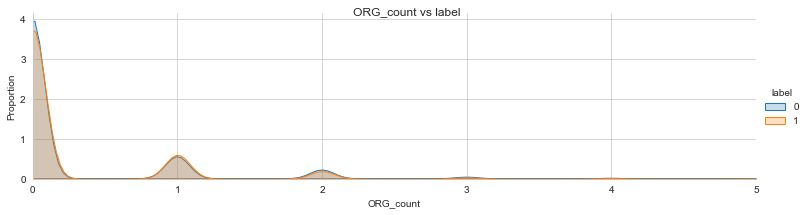

In [23]:
sns.set_style("whitegrid")
plotOne = sns.FacetGrid(df, hue="label",aspect=3.5)
plotOne.map(sns.kdeplot,'PER_count',shade=True)
plotOne.set(xlim=(0, 5))
plotOne.add_legend()
plotOne.set_axis_labels('PER_count', 'Proportion')
plotOne.fig.suptitle('PER_count vs label')
plt.show()

sns.set_style("whitegrid")
plotOne = sns.FacetGrid(df, hue="label",aspect=3.5)
plotOne.map(sns.kdeplot,'LOC_count',shade=True)
plotOne.set(xlim=(0, 5))
plotOne.add_legend()
plotOne.set_axis_labels('LOC_count', 'Proportion')
plotOne.fig.suptitle('LOC_count vs label')
plt.show()

sns.set_style("whitegrid")
plotOne = sns.FacetGrid(df, hue="label",aspect=3.5)
plotOne.map(sns.kdeplot,'ORG_count',shade=True)
plotOne.set(xlim=(0, 5))
plotOne.add_legend()
plotOne.set_axis_labels('ORG_count', 'Proportion')
plotOne.fig.suptitle('ORG_count vs label')
plt.show()



In [ ]:
label_0 = df[df["label"] == 0]
label_1 = df[df["label"] == 1]

s = s.apply(pd.Series).stack().reset_index(drop = True)
